In [101]:
## import dependencies

from mixpanel_api import Mixpanel
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import mpld3
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import scipy as stats
import statsmodels.api as sm
import sklearn


In [2]:
## import people data from MixPanel

if __name__ == '__main__':
  credentials = {
    'API_secret': '..',
    'token': '',
  }

  m = Mixpanel(credentials['API_secret'])
# # selector = ''  
#   selector = '(("US" in properties["$country_code"]) and (defined (properties["$country_code"])))'
#   parameters = {'selector': selector}

# m.export_people('people_export.txt',parameters,timezone_offset=-8)


In [3]:
## import txt file as json

with open('people_export.txt', 'r') as handle:
    parsed = json.load(handle)

## printing the json file, if needed    
#print(json.dumps(parsed, indent=4, sort_keys=True))



In [4]:
## convert json to dataframe

people_df = pd.DataFrame.from_dict(json_normalize(parsed), orient='columns')


In [209]:
#extract individual date and time from subs

people_df['Sub_End_Date'] = pd.to_datetime(people_df['$properties.$subscription_end_time']).dt.date
people_df['Sub_End_Time'] = pd.to_datetime(people_df['$properties.$subscription_end_time']).dt.time

people_df['$properties.$mp_message_sends.c3873500.c'] = people_df['$properties.$mp_message_sends.c3873500.c'].fillna(0)


In [6]:
people_df.head()

,$distinct_id,$properties.$ae_first_app_open_date,$properties.$ae_total_app_session_length,$properties.$ae_total_app_sessions,$properties.$android_app_version,$properties.$android_app_version_code,$properties.$android_brand,$properties.$android_devices,$properties.$android_lib_version,$properties.$android_manufacturer,$properties.$android_model,$properties.$android_os,$properties.$android_os_version,$properties.$android_push_error,$properties.$bounce_category,$properties.$bounce_notification,$properties.$bounced,$properties.$campaigns,$properties.$city,$properties.$country_code,$properties.$created_at,$properties.$distinct_id,$properties.$email,$properties.$first_name,$properties.$ios_app_release,$properties.$ios_app_version,$properties.$ios_device_model,$properties.$ios_devices,$properties.$ios_lib_version,$properties.$ios_version,$properties.$ip_address,$properties.$journeys,$properties.$last_activity_time,$properties.$last_name,$properties.$last_seen,$properties.$marked_spam,$properties.$mp_message_sends.c3601296.c,$properties.$mp_message_sends.c3601296.t,$properties.$mp_message_sends.c3601316.c,$properties.$mp_message_sends.c3601316.t,$properties.$mp_message_sends.c3601339.c,$properties.$mp_message_sends.c3601339.t,$properties.$mp_message_sends.c3601351.c,$properties.$mp_message_sends.c3601351.t,$properties.$mp_message_sends.c3610479.c,$properties.$mp_message_sends.c3610479.t,$properties.$mp_message_sends.c3614068.c,$properties.$mp_message_sends.c3614068.t,$properties.$mp_message_sends.c3627207.c,$properties.$mp_message_sends.c3627207.t,$properties.$mp_message_sends.c3787003.c,$properties.$mp_message_sends.c3787003.t,$properties.$mp_message_sends.c3787088.c,$properties.$mp_message_sends.c3787088.t,$properties.$mp_message_sends.c3790627.c,$properties.$mp_message_sends.c3790627.t,$properties.$mp_message_sends.c3799568.c,$properties.$mp_message_sends.c3799568.t,$properties.$mp_message_sends.c3800327.c,$properties.$mp_message_sends.c3800327.t,$properties.$mp_message_sends.c3800652.c,$properties.$mp_message_sends.c3800652.t,$properties.$mp_message_sends.c3820051.c,$properties.$mp_message_sends.c3820051.t,$properties.$mp_message_sends.c3820091.c,$properties.$mp_message_sends.c3820091.t,$properties.$mp_message_sends.c3836573.c,$properties.$mp_message_sends.c3836573.t,$properties.$mp_message_sends.c3847019.c,$properties.$mp_message_sends.c3847019.t,$properties.$mp_message_sends.c3858479.c,$properties.$mp_message_sends.c3858479.t,$properties.$mp_message_sends.c3858496.c,$properties.$mp_message_sends.c3858496.t,$properties.$mp_message_sends.c3858508.c,$properties.$mp_message_sends.c3858508.t,$properties.$mp_message_sends.c3873500.c,$properties.$mp_message_sends.c3873500.t,$properties.$mp_message_sends.c3873556.c,$properties.$mp_message_sends.c3873556.t,$properties.$mp_message_sends.c3873571.c,$properties.$mp_message_sends.c3873571.t,$properties.$mp_message_sends.c3882903.c,$properties.$mp_message_sends.c3882903.t,$properties.$mp_message_sends.c3882911.c,$properties.$mp_message_sends.c3882911.t,$properties.$mp_message_sends.c3918476.c,$properties.$mp_message_sends.c3918476.t,$properties.$mp_message_sends.c3918596.c,$properties.$mp_message_sends.c3918596.t,$properties.$mp_message_sends.c3954584.c,$properties.$mp_message_sends.c3954584.t,$properties.$mp_message_sends.c3954696.c,$properties.$mp_message_sends.c3954696.t,$properties.$mp_message_sends.c3954823.c,$properties.$mp_message_sends.c3954823.t,$properties.$mp_message_sends.c3954884.c,$properties.$mp_message_sends.c3954884.t,$properties.$mp_message_sends.c3954899.c,$properties.$mp_message_sends.c3954899.t,$properties.$mp_message_sends.c3957156.c,$properties.$mp_message_sends.c3957156.t,$properties.$mp_message_sends.c3957171.c,$properties.$mp_message_sends.c3957171.t,$properties.$mp_message_sends.c3957499.c,$properties.$mp_message_sends.c3957499.t,$properties.$mp_message_sends.c3977607.c,$properties.$mp_message_sends.c3977607.t,$properties.$mp_message_sends.c3985496.c,$properties.$m

In [199]:
#assess how many unique columns and distinct IDs exist in the dataset

print(len(people_df.groupby('$distinct_id')['$distinct_id'].nunique()))
print(len(people_df))


296820

In [245]:
#user counts by city

city_counts = people_df.groupby('$properties.$city')['$distinct_id'].count().reset_index()
city_counts=city_counts.sort_values('$distinct_id',ascending=False)
city_counts.head(20)


,$properties.$city,$distinct_id
3522,Los Angeles,9924
4310,New York,8117
1094,Chicago,7146
715,Brooklyn,5703
574,Boardman,5639
5485,San Francisco,5184
5629,Seattle,5120
1557,Denver,4744
5020,Portland,4155
1459,Dallas,3791


In [230]:
#create new variables with date and time of subcription end, last activity date, and last opened date

people_df['Sub_End_Date'] = pd.to_datetime(people_df['$properties.$subscription_end_time']).dt.date
people_df['Sub_End_Time'] = pd.to_datetime(people_df['$properties.$subscription_end_time']).dt.time

people_df['Last_Seen_Date'] = pd.to_datetime(people_df['$properties.$last_seen']).dt.date
people_df['Last_Seen_Time'] = pd.to_datetime(people_df['$properties.$last_seen']).dt.time

people_df['Last_Activity_Date'] = pd.to_datetime(people_df['$properties.$last_activity_time']).dt.date
people_df['Last_Activity_Time'] = pd.to_datetime(people_df['$properties.$last_activity_time']).dt.time

people_df['Account_Created_Date'] = pd.to_datetime(people_df['$properties.$created_at']).dt.date
people_df['Account_Created_Time'] = pd.to_datetime(people_df['$properties.$created_at']).dt.time



In [125]:
#crosstabulate date with number of churned users by date

sub_end_date = people_df.loc[:,['Sub_End_Date','$distinct_id']]
sub_end_date_plot = sub_end_date.groupby('Sub_End_Date').count().reset_index()
sub_end_date_plot['Sub_End_Date'] = pd.to_datetime(sub_end_date_plot['Sub_End_Date']) 
sub_end_date_plot = sub_end_date_plot.loc[(sub_end_date_plot['Sub_End_Date'] > '2018-10-31') & (sub_end_date_plot['Sub_End_Date'] <= '2019-6-30')]
sub_end_date_plot = sub_end_date_plot.rename(columns={'Sub_End_Date':'Date','$distinct_id': 'Subs Ended'})#.sort_values('Subs Ended',ascending=False)
sub_end_date_plot

,Date,Subs Ended
0,2018-11-24,1
1,2018-11-28,1
2,2018-11-29,5
3,2018-11-30,8
4,2018-12-01,7
5,2018-12-02,1
6,2018-12-03,5
7,2018-12-04,5
8,2018-12-05,7
9,2018-12-06,6


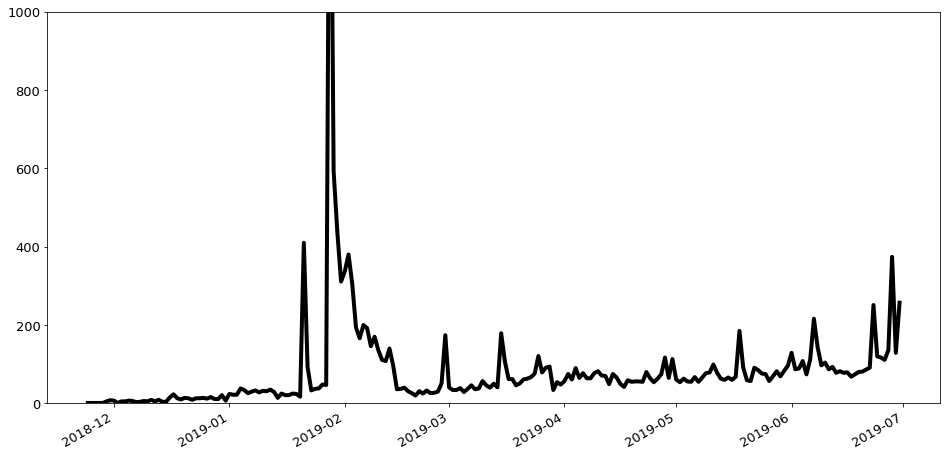

In [126]:
#plot churn by date

churn_plot = sub_end_date_plot.plot.line(x='Date',color='black', linewidth=4.0, legend=None, fontsize=13)
plt.xlabel("")
plt.ylim([0, 1000])
plt.gcf().set_size_inches(16,8)
plt.savefig('churn.png', transparent=True,dpi=(300), bbox_inches = "tight",edgecolor='w')



In [250]:
#isolate campaign related variables and format for richer analysis

churn_campaign_eval = people_df.loc[:,['$distinct_id','$properties.$mp_message_sends.c3873500.c','$properties.$mp_message_sends.c3873500.t','Sub_End_Date', 'Last_Seen_Date','Last_Activity_Date','$properties.$android_brand','$properties.$ios_device_model','$properties.$country_code','$properties.$city','Account_Created_Date','Account_Created_Time']]

churn_campaign_eval['Campaign_End_Date'] = pd.Timestamp('2019-6-30')

churn_campaign_eval['Churn_Campaign_Sent'] = pd.to_datetime(churn_campaign_eval['$properties.$mp_message_sends.c3873500.t'],unit='s')
churn_campaign_eval['Churn_Campaign_Date'] = pd.to_datetime(churn_campaign_eval['Churn_Campaign_Sent']).dt.date
churn_campaign_eval['Churn_Campaign_Time'] = pd.to_datetime(churn_campaign_eval['Churn_Campaign_Sent']).dt.time
churn_campaign_eval['Churn_Campaign_Date'] = pd.to_datetime(churn_campaign_eval['Churn_Campaign_Date'])
churn_campaign_eval['Sub_End_Date'] = pd.to_datetime(churn_campaign_eval['Sub_End_Date'])
churn_campaign_eval['Last_Activity_Date'] = pd.to_datetime(churn_campaign_eval['Last_Activity_Date'])
churn_campaign_eval['Last_Seen_Date'] = pd.to_datetime(churn_campaign_eval['Last_Seen_Date'])
churn_campaign_eval['Account_Created_Date'] = pd.to_datetime(churn_campaign_eval['Account_Created_Date'])

churn_campaign_eval = churn_campaign_eval.loc[(churn_campaign_eval['Sub_End_Date'] > '2018-10-31') & (churn_campaign_eval['Sub_End_Date'] <= '2019-6-16')]


churn_campaign_eval['Churn_Campaign_Gap'] = (churn_campaign_eval['Campaign_End_Date'])- (churn_campaign_eval['Sub_End_Date'])
churn_campaign_eval['Churn_Campaign_Gap']=churn_campaign_eval['Churn_Campaign_Gap'].dt.days

churn_campaign_eval['Post_Churn_Reactivation_Gap'] = (churn_campaign_eval['Last_Activity_Date'])- (churn_campaign_eval['Sub_End_Date'])
churn_campaign_eval['Post_Churn_Reactivation_Gap'] = churn_campaign_eval['Post_Churn_Reactivation_Gap'].dt.days

#Flag for post campaign reactivation

churn_campaign_eval['Post_Churn_Reactivated']= np.where((churn_campaign_eval['Post_Churn_Reactivation_Gap']>-1),1,0)


churn_campaign_eval['Post_Churn_Seen_Gap'] = (churn_campaign_eval['Last_Seen_Date'])- (churn_campaign_eval['Sub_End_Date'])
churn_campaign_eval['Post_Churn_Seen_Gap'] = churn_campaign_eval['Post_Churn_Seen_Gap'].dt.days

churn_campaign_eval['Campaign_End'] = '2019-06-16'
churn_campaign_eval['Campaign_End'] = pd.to_datetime(churn_campaign_eval['Campaign_End'])


churn_campaign_eval['Days_Since_Reg'] = (churn_campaign_eval['Campaign_End'])- (churn_campaign_eval['Account_Created_Date'])
churn_campaign_eval['Days_Since_Reg'] = churn_campaign_eval['Days_Since_Reg'].dt.days

#Flag for post campaign reactivation

churn_campaign_eval['Post_Churn_Seen']= np.where((churn_campaign_eval['Post_Churn_Seen_Gap']>-1),1,0)

churn_campaign_eval.head()

,$distinct_id,$properties.$mp_message_sends.c3873500.c,$properties.$mp_message_sends.c3873500.t,Sub_End_Date,Last_Seen_Date,Last_Activity_Date,$properties.$android_brand,$properties.$ios_device_model,$properties.$country_code,$properties.$city,Account_Created_Date,Account_Created_Time,Campaign_End_Date,Churn_Campaign_Sent,Churn_Campaign_Date,Churn_Campaign_Time,Churn_Campaign_Gap,Post_Churn_Reactivation_Gap,Post_Churn_Reactivated,Post_Churn_Seen_Gap,Campaign_End,Days_Since_Reg,Post_Churn_Seen
14,178724,0.0,NaN,2019-02-09,2019-04-20,2019-02-15,google,NaN,US,Brookline,2018-10-29,16:05:26,2019-06-30,NaT,NaT,NaT,141,6.0,1,70,2019-06-16,230,1
20,179785,1.0,1.556032e+09,2019-02-14,2019-01-16,2019-01-14,OnePlus,NaN,US,Boardman,2018-10-29,17:31:01,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,136,-31.0,0,-29,2019-06-16,230,0
47,187585,1.0,1.556032e+09,2019-01-28,2019-06-04,2019-01-28,samsung,NaN,US,Athens,2018-10-30,17:21:04,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,153,0.0,1,127,2019-06-16,229,1
66,202302,1.0,1.556032e+09,2019-02-01,2019-01-16,2019-01-01,OnePlus,NaN,US,Boardman,2018-11-03,11:09:26,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,149,-31.0,0,-16,2019-06-16,225,0
67,204922,1.0,1.556032e+09,2019-01-21,2019-01-16,2018-11-28,samsung,NaN,US,Boardman,2018-11-04,11:59:40,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,160,-54.0,0,-5,2019-06-16,224,0


In [256]:
churn_campaign_eval.groupby('$properties.$mp_message_sends.c3873500.c').mean()


,$properties.$mp_message_sends.c3873500.t,Churn_Campaign_Gap,Post_Churn_Reactivation_Gap,Post_Churn_Reactivated,Post_Churn_Seen_Gap,Days_Since_Reg,Post_Churn_Seen
$properties.$mp_message_sends.c3873500.c,,,,,,,
0.0,NaN,82.309868,-25.095976,0.117329,-4.832130,145.142298,0.391095
1.0,1.556684e+09,113.128862,-22.316065,0.146790,5.993677,184.307908,0.425644


In [18]:
#recode missing data from campaign sendout to zero

churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'] = churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'].fillna(0)

#t-test last active
cat1 = churn_campaign_eval[churn_campaign_eval['$properties.$mp_message_sends.c3873500.c']==1]
cat2 = churn_campaign_eval[churn_campaign_eval['$properties.$mp_message_sends.c3873500.c']==0]

ttest_ind(cat1['Post_Churn_Reactivated'], cat2['Post_Churn_Reactivated'])


Ttest_indResult(statistic=4.345191949219483, pvalue=1.4002158080738347e-05)

In [19]:
#recode missing data from campaign sendout to zero

churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'] = churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'].fillna(0)

#t-test last seen in app
cat1 = churn_campaign_eval[churn_campaign_eval['$properties.$mp_message_sends.c3873500.c']==1]
cat2 = churn_campaign_eval[churn_campaign_eval['$properties.$mp_message_sends.c3873500.c']==0]

ttest_ind(cat1['Post_Churn_Seen'], cat2['Post_Churn_Seen'])

Ttest_indResult(statistic=3.5899442096909344, pvalue=0.00033174966707484246)

#Assess reactivation rates by test versus control

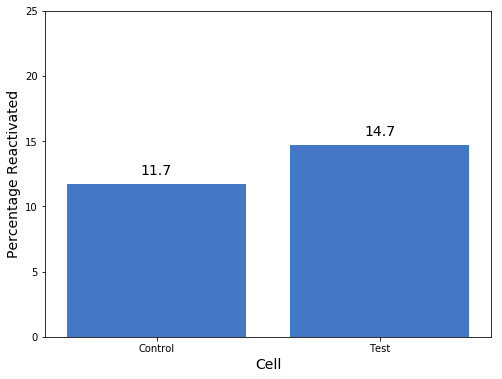

In [117]:
#create bar chart dataframe for reactivation date by test versus control

Reactivation_Rate=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['Post_Churn_Reactivated'],normalize='index').round(3)*100
Reactivation_Rate=Reactivation_Rate.loc[:,1].reset_index()
Reactivation_Rate=Reactivation_Rate.replace({0: 'Control', 1: 'Test'})
Reactivation_Rate=Reactivation_Rate.rename(columns={1: 'Reactivated_Percent'})

#build chart
sns.barplot(data=Reactivation_Rate, x='$properties.$mp_message_sends.c3873500.c',y='Reactivated_Percent',color='#2f73d952')
plt.ylim([0.0, 25.0])

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()+0.5, '{0:.1f}'.format(p.get_height()), 
            fontsize=14, color='black', ha='center', va='bottom')

#label axes, plot size, and export
plt.xlabel("Cell", fontsize=14)
plt.ylabel("Percentage Reactivated", fontsize=14)

plt.gcf().set_size_inches(8,6)
plt.savefig('Reactivation Rate.png', transparent=True,dpi=(300),edgecolor='w')

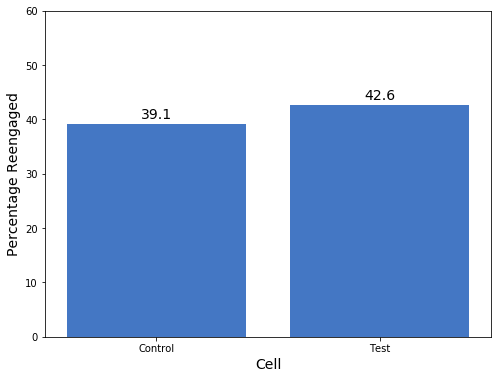

In [118]:
#create bar chart dataframe for re-engagement date by test versus control

ReEngagement_Rate=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['Post_Churn_Seen'],normalize='index').round(3)*100
ReEngagement_Rate=ReEngagement_Rate.loc[:,1].reset_index()
ReEngagement_Rate=ReEngagement_Rate.replace({0: 'Control', 1: 'Test'})
ReEngagement_Rate=ReEngagement_Rate.rename(columns={1: 'Reengaged_Percent'})

#build chart
sns.barplot(data=ReEngagement_Rate, x='$properties.$mp_message_sends.c3873500.c',y='Reengaged_Percent',color='#2f73d952')
plt.ylim([0.0, 60.0])

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()+0.5, '{0:.1f}'.format(p.get_height()), 
            fontsize=14, color='black', ha='center', va='bottom')

#label axes, plot size, and export
plt.xlabel("Cell", fontsize=14)
plt.ylabel("Percentage Reengaged", fontsize=14)

plt.gcf().set_size_inches(8,6)
plt.savefig('Reengagement Rate.png', transparent=True,dpi=(300),edgecolor='w')

Start Composition Analysis

In [221]:
#exploration of test and control compoisition - Android Devices

android_comp=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['$properties.$android_brand'],normalize='index').round(3)*100
android_comp=android_comp.transpose().reset_index()
android_comp=android_comp.rename(columns={0:'Control',1:'Test'})
android_comp=android_comp.sort_values('Test',ascending=False)
android_comp.head()


$properties.$mp_message_sends.c3873500.c,$properties.$android_brand,Control,Test
49,samsung,38.1,40.5
42,google,28.8,21.8
46,motorola,9.3,9.1
45,lge,6.1,6.1
31,Verizon,6.4,5.1


In [222]:
#exploration of test and control compoisition - iOS Devices

ios_comp=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['$properties.$ios_device_model'],normalize='index').round(3)*100
ios_comp=ios_comp.transpose().reset_index()
ios_comp=ios_comp.rename(columns={0:'Control',1:'Test'})
ios_comp=ios_comp.sort_values('Test',ascending=False)
ios_comp.head()

$properties.$mp_message_sends.c3873500.c,$properties.$ios_device_model,Control,Test
39,"iPhone9,1",10.0,9.0
36,"iPhone8,1",9.4,8.6
25,"iPhone10,3",8.2,8.6
23,"iPhone10,1",7.9,7.0
29,"iPhone11,2",6.1,6.5


In [257]:
#exploration of test and control compoisition - country

country_comp=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['$properties.$country_code'])#,normalize='index').round(3)*100
country_comp=country_comp.transpose().reset_index()
country_comp=country_comp.rename(columns={0:'Control',1:'Test'})
country_comp=country_comp.sort_values('Test',ascending=False)
country_comp.head()

$properties.$mp_message_sends.c3873500.c,$properties.$country_code,Control,Test
0,US,3324,12494


In [225]:
#create a variable for primary OS
churn_campaign_eval['OS'] = np.where(churn_campaign_eval['$properties.$ios_device_model'].isnull(), 'Android / Other', 'Apple')


#exploration of test and control compoisition - country

OS_comp=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['OS'],normalize='index').round(3)*100
OS_comp=OS_comp.transpose().reset_index()
OS_comp=OS_comp.rename(columns={0:'Control',1:'Test'})
OS_comp=OS_comp.sort_values('Test',ascending=False)
OS_comp.head()



$properties.$mp_message_sends.c3873500.c,OS,Control,Test
0,Android / Other,59.5,55.7
1,Apple,40.5,44.3


In [248]:
#exploration of test and control compoisition - city

city_comp=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['$properties.$city'],normalize='index').round(3)*100
#city_comp=pd.crosstab(churn_campaign_eval['$properties.$mp_message_sends.c3873500.c'],churn_campaign_eval['$properties.$city'])

city_comp=city_comp.transpose().reset_index()
city_comp=city_comp.rename(columns={0:'Control',1:'Test'})
city_comp=city_comp.sort_values('Test',ascending=False)
city_comp.head(10)

$properties.$mp_message_sends.c3873500.c,$properties.$city,Control,Test
193,Boardman,19.2,32.6
1081,Los Angeles,3.3,2.5
1308,New York,3.4,2.0
352,Chicago,2.1,1.8
1673,San Francisco,2.8,1.5
1727,Seattle,1.4,1.3
238,Brooklyn,1.6,1.3
1529,Portland,1.3,1.2
481,Denver,1.5,1.1
849,Houston,0.8,0.9


In [255]:
#exploration of test and control composition - days since registration

days_since_reg_comp=churn_campaign_eval.groupby('$properties.$mp_message_sends.c3873500.c').mean()
days_since_reg_comp

# days_since_reg_comp=days_since_reg_comp.transpose().reset_index()
# days_since_reg_comp=days_since_reg_comp.rename(columns={0:'Control',1:'Test'})
# days_since_reg_comp=days_since_reg_comp.sort_values('Test',ascending=False)
# days_since_reg_comp.head(10)

,$properties.$mp_message_sends.c3873500.t,Churn_Campaign_Gap,Post_Churn_Reactivation_Gap,Post_Churn_Reactivated,Post_Churn_Seen_Gap,Days_Since_Reg,Post_Churn_Seen
$properties.$mp_message_sends.c3873500.c,,,,,,,
0.0,NaN,82.309868,-25.095976,0.117329,-4.832130,145.142298,0.391095
1.0,1.556684e+09,113.128862,-22.316065,0.146790,5.993677,184.307908,0.425644


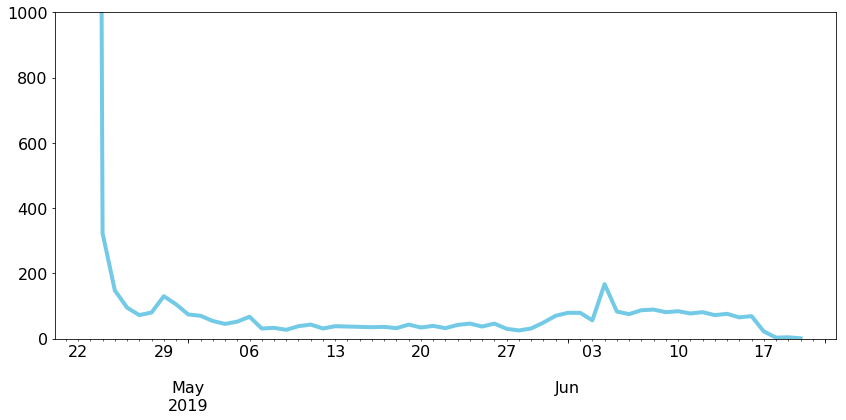

In [249]:
#plot campaign sendouts

churn_campaign = churn_campaign_eval.loc[:,['$distinct_id','Churn_Campaign_Date']]
churn_campaign=churn_campaign.groupby('Churn_Campaign_Date').count().reset_index()
churn_campaign = churn_campaign.rename(columns={'Churn_Campaign_Date':'Date','$distinct_id': 'Campaign Received'})

churn_campaign_plot= churn_campaign.plot.line(x='Date',color='#73cae7', linewidth=4.0, legend=None, fontsize=16)
plt.xlabel("")
plt.gcf().set_size_inches(14,6)
plt.ylim([0, 1000])
plt.savefig('wave 1 sendouts.png', transparent=True,dpi=(300),edgecolor='w')


In [25]:
#recode date field and merge churn and campaign sendout dateframes

churn_campaign['Date'] = pd.to_datetime(churn_campaign['Date']) 
Churn_Campaign=pd.merge(sub_end_date_plot,churn_campaign, how='left', on='Date')
Churn_Campaign

In [26]:
Churn_Campaign


,Date,Subs Ended,Campaign Received
0,2018-11-24,1,NaN
1,2018-11-28,1,NaN
2,2018-11-29,5,NaN
3,2018-11-30,8,NaN
4,2018-12-01,7,NaN
5,2018-12-02,1,NaN
6,2018-12-03,5,NaN
7,2018-12-04,5,NaN
8,2018-12-05,7,NaN
9,2018-12-06,6,NaN


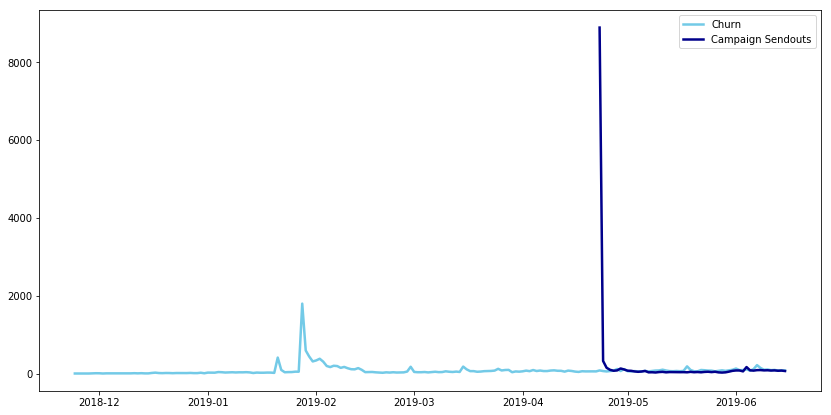

In [27]:
#plot churn and campaign sendouts together

import seaborn as sns
sns.lineplot(data=Churn_Campaign, x='Date',y='Subs Ended',color='#73cae7', linewidth=2.5, label='Churn')
sns.lineplot(data=Churn_Campaign, x='Date',y='Campaign Received',color='darkblue', linewidth=2.5, label='Campaign Sendouts')

plt.xlabel("")
plt.ylabel("")
plt.legend=('Best')
plt.gcf().set_size_inches(14,7)

In [224]:
#isolate campaign to users who reactivated

campaign_reactivation = churn_campaign_eval.loc[(churn_campaign_eval['Post_Churn_Reactivation_Gap'] > -1) & (churn_campaign_eval['Post_Churn_Reactivation_Gap'] < 31)]
campaign_reactivation=campaign_reactivation.groupby(['Post_Churn_Reactivation_Gap','$properties.$mp_message_sends.c3873500.c']).count().reset_index()

campaign_reactivation_test=campaign_reactivation.loc[campaign_reactivation['$properties.$mp_message_sends.c3873500.c']==1]
campaign_reactivation_control=campaign_reactivation.loc[campaign_reactivation['$properties.$mp_message_sends.c3873500.c']==0]

campaign_reactivation_test.head()

,Post_Churn_Reactivation_Gap,$properties.$mp_message_sends.c3873500.c,$distinct_id,$properties.$mp_message_sends.c3873500.t,Sub_End_Date,Last_Seen_Date,Last_Activity_Date,$properties.$android_brand,$properties.$ios_device_model,$properties.$country_code,Campaign_End_Date,Churn_Campaign_Sent,Churn_Campaign_Date,Churn_Campaign_Time,Churn_Campaign_Gap,Post_Churn_Reactivated,Post_Churn_Seen_Gap,Post_Churn_Seen
1,0.0,1.0,313,313,313,313,313,85,197,313,313,313,313,313,313,313,313,313
3,1.0,1.0,67,67,67,67,67,21,35,67,67,67,67,67,67,67,67,67
5,2.0,1.0,50,50,50,50,50,12,33,50,50,50,50,50,50,50,50,50
7,3.0,1.0,49,49,49,49,49,14,27,49,49,49,49,49,49,49,49,49
9,4.0,1.0,31,31,31,31,31,7,21,31,31,31,31,31,31,31,31,31


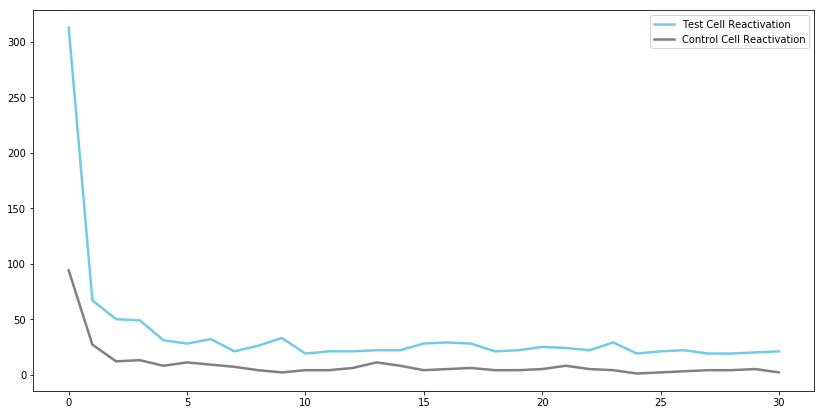

In [29]:
#plot reactivated user rates by test versus control

sns.lineplot(data=campaign_reactivation_test, x='Post_Churn_Reactivation_Gap',y='$distinct_id',color='#73cae7', linewidth=2.5, label='Test Cell Reactivation')
sns.lineplot(data=campaign_reactivation_control, x='Post_Churn_Reactivation_Gap',y='$distinct_id',color='grey', linewidth=2.5, label='Control Cell Reactivation')

plt.xlabel("")
plt.ylabel("")
plt.legend=('Best')
plt.gcf().set_size_inches(14,7)

In [30]:
#pull events csv data 

file_name = 'Events Data/events_{}.csv'

csv_list = []
for i in range(1, 31):
    csv_list.append(pd.read_csv(file_name.format(i)))

events_data = pd.concat(csv_list)


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,34,35,36,38,39,40,41,52,54,57,58,63,65,67,69,73,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,14,18,37,38,39,41,42,43,44,46,54,57,59,62,63,68,70,71,73,79,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,14,18,37,38,39,41,42,43,44,46,54,57,58,59,62,63,68,70,71,73,79,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarn

In [259]:
len(events_data)


32775103

In [263]:
events_data.head()


,event,properties.$ae_crashed_reason,properties.$ae_iap_name,properties.$ae_iap_price,properties.$ae_iap_quantity,properties.$ae_session_length,properties.$ae_updated_version,properties.$app_build_number,properties.$app_release,properties.$app_version,properties.$app_version_string,properties.$bluetooth_enabled,properties.$bluetooth_version,properties.$brand,properties.$browser,properties.$browser_version,properties.$carrier,properties.$city,properties.$device,properties.$device_id,properties.$google_play_services,properties.$had_persisted_distinct_id,properties.$has_nfc,properties.$has_telephone,properties.$insert_id,properties.$lib_version,properties.$manufacturer,properties.$model,properties.$os,properties.$os_version,properties.$radio,properties.$region,properties.$screen_dpi,properties.$screen_height,properties.$screen_width,properties.$user_id,properties.$wifi,properties.Article Name,properties.Category Name,properties.Duration,properties.Mailbox Name,properties.Site Name,properties.Tags,properties.URL,properties.Url,properties.User,properties.campaign_id,properties.category,properties.content,properties.content_id,properties.content_type,properties.courseType,properties.currency,properties.delivery_id,properties.distinct_id,properties.domain,properties.duration,properties.duration_seconds,properties.finished_at,properties.id,properties.is_journey_control,properties.journey_id,properties.message_id,properties.message_name,properties.message_type,properties.mp_country_code,properties.mp_lib,properties.mp_processing_time_ms,properties.pin,properties.pin_entered,properties.progress_id,properties.progress_type,properties.promo_code,properties.recipient,properties.revenue,properties.sent_to,properties.subscription_end_time,properties.subscription_id,properties.subscription_provider,properties.subscription_start_time,properties.subscription_type,properties.term,properties.time,properties.title,properties.trackId,properties.type,properties.url
0,Start Download,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,1.1.8,NaN,NaN,NaN,NaN,NaN,Sprint,Iowa City,NaN,C33EF6C8-9D5F-4592-A376-C3C756BAD40A,NaN,NaN,NaN,NaN,c6bee7700297e224,2.5.7,Apple,"iPhone10,3",iOS,12.1.4,LTE,Iowa,NaN,812.0,375.0,29893.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29893,NaN,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN,NaN,US,swift,1554361246519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1554336000,NaN,NaN,NaN,https://d2gjq0pbfe53js.cloudfront.net/courses/...
1,Remove Download,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,1.1.8,NaN,NaN,NaN,NaN,NaN,KPN NL,Amsterdam,NaN,84CA3DBE-2861-4912-824B-CACAFD8F2E88,NaN,NaN,NaN,NaN,6c5b3a571ec8622b,2.5.7,Apple,"iPhone10,3",iOS,12.1.4,LTE,North Holland,NaN,812.0,375.0,396909.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396909,NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,NaN,NaN,NL,swift,1554361256696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1554336000,NaN,NaN,NaN,NaN
2,Onboarding Get Started,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,1.1.8,NaN,NaN,NaN,NaN,NaN,Telstra,Narangba,NaN,FC24C923-8A32-4D4C-B6FA-70726E1CF3DA,NaN,NaN,NaN,NaN,d7b0419a167db612,2.5.7,Apple,"iPhone9,3",iOS,12.1.2,LTE,Queensland,NaN,667.0,375.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC24C923-8A32-4D4C-B6FA-70726E1CF3DA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AU,swift,1554361269056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1554336000,NaN,NaN,NaN,NaN
3,Server Progress Created,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bellevue,NaN,NaN,NaN,NaN,NaN,NaN,hwdbfpbglnamdgyu,2.2.0,NaN,NaN,NaN,NaN,NaN,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,ruby,1554361201102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1554336000,Day Forty Two,NaN,NaN,NaN
4,Remove Download,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,1.1.8,NaN,NaN,NaN,NaN,NaN,Three,Huddersfield,NaN,4

In [264]:
#isolate only resubscriber events and relevant columns

resubscribers_df=events_data.loc[events_data['event']=='Resubscription']
resubscribers_df=resubscribers_df.loc[:,['event','properties.$insert_id', 'properties.time','properties.distinct_id']].reset_index()

In [265]:
#convert unix dates to date-time
#NOTE ALL USER IDs are null values

resubscribers_df['Resub_Date'] = pd.to_datetime(resubscribers_df['properties.time'], unit='s').dt.date
resubscribers_df['Resub_Time'] = pd.to_datetime(resubscribers_df['properties.time'], unit='s').dt.time
resubscribers_df=resubscribers_df.rename(columns={'properties.distinct_id':'$distinct_id'})
resubscribers_df.head(10)


,index,event,properties.$insert_id,properties.time,$distinct_id,Resub_Date,Resub_Time
0,5741,Resubscription,vrjuurdqsyszqomi,1554337983,308559,2019-04-04,00:33:03
1,9283,Resubscription,altgpmxcfvgdwfne,1554339442,254485,2019-04-04,00:57:22
2,10502,Resubscription,xmskzwmmhidcwhrs,1554340025,174160,2019-04-04,01:07:05
3,12237,Resubscription,mzonsqtukdefwhrm,1554340867,311220,2019-04-04,01:21:07
4,13058,Resubscription,woytowqrqihxieok,1554341310,315362,2019-04-04,01:28:30
5,14156,Resubscription,yqjqekbdzqlkarud,1554341833,343302,2019-04-04,01:37:13
6,16545,Resubscription,vzroxwihnkjairkt,1554343033,209078,2019-04-04,01:57:13
7,16991,Resubscription,wzqffzvcnaxegkwi,1554343285,305917,2019-04-04,02:01:25
8,18518,Resubscription,jnrwudippwqhffeb,1554343974,203613,2019-04-04,02:12:54
9,21617,Resubscription,nltotmxhxaxtggdo,1554345304,540373,2019-04-04,02:35:04


In [266]:
#group resubscribers by date for analysis

resubs_plot = resubscribers_df.groupby('Resub_Date').count().reset_index()
resubs_plot['Resub_Date'] = pd.to_datetime(resubs_plot['Resub_Date']) 
resubs_plot = resubs_plot.rename(columns={'Resub_Date': 'Date'})
resubs_plot = resubs_plot.loc[:,['Date','index']]

resubs_plot


,Date,index
0,2019-04-01,116
1,2019-04-02,98
2,2019-04-03,101
3,2019-04-04,82
4,2019-04-05,69
5,2019-04-06,75
6,2019-04-07,78
7,2019-04-08,75
8,2019-04-09,99
9,2019-04-10,80


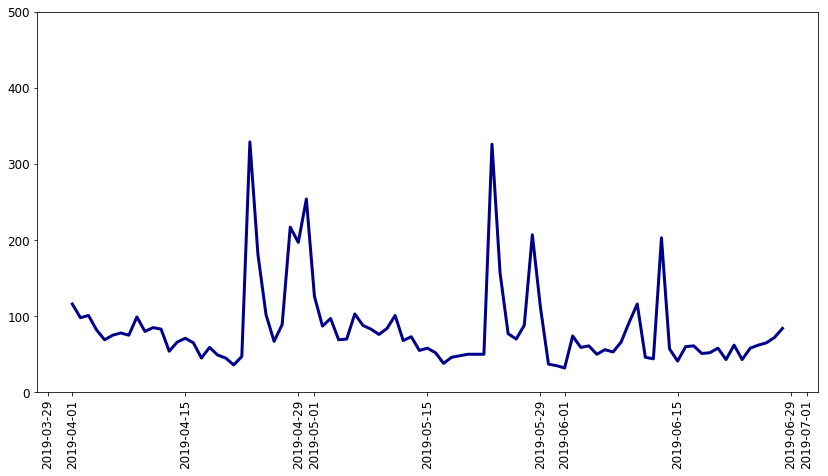

In [267]:
#plot resubsribers

sns.lineplot(data=resubs_plot, x='Date',y='index',color='darkblue', linewidth=3)


plt.xlabel("")
plt.ylabel("")
plt.legend=('Best')
plt.gcf().set_size_inches(14,7)
plt.tick_params(labelsize=12)
plt.ylim([0, 500])
plt.xticks(rotation=90)


plt.savefig('Resubscriber events.png', transparent=True,dpi=(300))




In [268]:
#change date types for IDs for merging

resubscribers_df["$distinct_id"] = resubscribers_df["$distinct_id"].astype(float)
churn_campaign_eval["$distinct_id"] = churn_campaign_eval["$distinct_id"].astype(float)


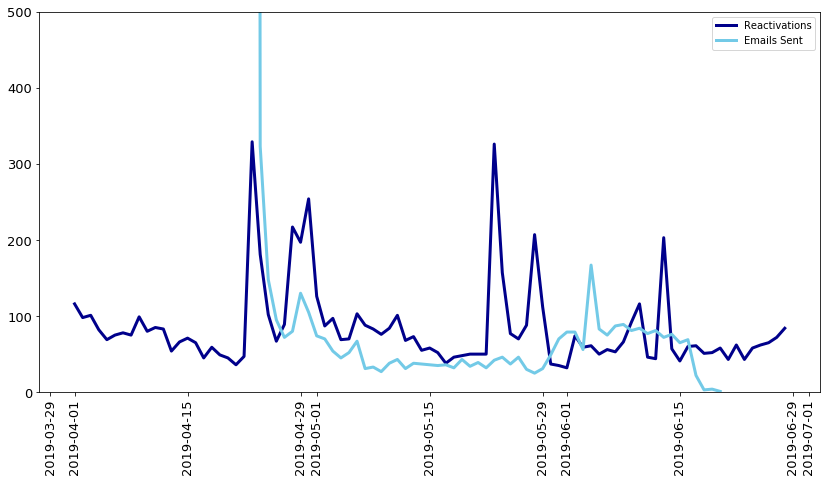

In [269]:
#plot campaign sendout and resubscribers

sns.lineplot(data=resubs_plot, x='Date',y='index',color='darkblue', linewidth=3,label='Reactivations')
sns.lineplot(data=churn_campaign, x='Date',y='Campaign Received',color='#73cae7', linewidth=3, label='Emails Sent')

plt.xlabel("")
plt.ylabel("")
plt.legend=('Best')
plt.gcf().set_size_inches(14,7)
plt.tick_params(labelsize=13)
plt.xticks(rotation=90)



plt.ylim([0, 500])
plt.savefig('Resubscribers + Campaign Activity.png', transparent=True,dpi=(300))


In [270]:
#merge campaign sendouts by date and resubscriber rates by date 

resubs_plot = resubs_plot.rename(columns={'Resub_Date': 'Date'})
Churn_Resubs_Date=pd.merge(resubs_plot,churn_campaign, how='left', on='Date')
Churn_Resubs_Date = Churn_Resubs_Date.rename(columns={'Campaign Received': 'campaignReceived'})

#isolate necessary fields for additional analysis
Churn_Resubs_Date = Churn_Resubs_Date.loc[(Churn_Resubs_Date['Date'] > '2019-04-22') & (Churn_Resubs_Date['Date'] <= '2019-6-16')]
Churn_Resubs_Date = Churn_Resubs_Date.loc[:,['Date','index','campaignReceived']]

Churn_Resubs_Date.head()


,Date,index,campaignReceived
22,2019-04-23,329,8888.0
23,2019-04-24,181,323.0
24,2019-04-25,102,148.0
25,2019-04-26,67,95.0
26,2019-04-27,89,72.0


In [271]:
#correlation coefficient between email sendout and reactivation

Churn_Resubs_Date.corr(method='pearson', min_periods=1)


,index,campaignReceived
index,1.000000,0.479581
campaignReceived,0.479581,1.000000


In [272]:
#reshape X and y for linear regression
y = Churn_Resubs_Date.index.values.reshape(-1, 1)
X = Churn_Resubs_Date.campaignReceived.values.reshape(-1, 1)



In [273]:
#fit model for sklearn regression

model = LinearRegression()
model.fit(X, y)


#output coefficients

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-0.00318444]]
y-axis intercept:  [49.72165277]


In [116]:
#fit model for statsmodels regression

Churn_Resubs_Date = Churn_Resubs_Date[Churn_Resubs_Date.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

X = Churn_Resubs_Date['campaignReceived']
y = Churn_Resubs_Date["index"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  index   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     15.83
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           0.000212
Time:                        19:42:11   Log-Likelihood:                -302.50
No. Observations:                  55   AIC:                             609.0
Df Residuals:                      53   BIC:                             613.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               88.8198      8.281     10.726      0.000      72.210     105.430
campaignReceived     0.0274      0.007      3.979      0.000       0.014       0.041
==============================================================================
Omnibus:                       34.206   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.399
Skew:                           1.990   Prob(JB):                     3.13e-16
Kurtosis:                       6.913   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysis of ressubscritions from A/B test

In [283]:
#merge churned users with resubscribed users

ab_resubscribers_df=pd.merge(churn_campaign_eval, resubscribers_df, how='left', on='$distinct_id')
ab_resubscribers_df.head()


,$distinct_id,$properties.$mp_message_sends.c3873500.c,$properties.$mp_message_sends.c3873500.t,Sub_End_Date,Last_Seen_Date,Last_Activity_Date,$properties.$android_brand,$properties.$ios_device_model,$properties.$country_code,$properties.$city,Account_Created_Date,Account_Created_Time,Campaign_End_Date,Churn_Campaign_Sent,Churn_Campaign_Date,Churn_Campaign_Time,Churn_Campaign_Gap,Post_Churn_Reactivation_Gap,Post_Churn_Reactivated,Post_Churn_Seen_Gap,Campaign_End,Days_Since_Reg,Post_Churn_Seen,index,event,properties.$insert_id,properties.time,Resub_Date,Resub_Time
0,178724.0,0.0,NaN,2019-02-09,2019-04-20,2019-02-15,google,NaN,US,Brookline,2018-10-29,16:05:26,2019-06-30,NaT,NaT,NaT,141,6.0,1,70,2019-06-16,230,1,NaN,NaN,NaN,NaN,NaN,NaN
1,179785.0,1.0,1.556032e+09,2019-02-14,2019-01-16,2019-01-14,OnePlus,NaN,US,Boardman,2018-10-29,17:31:01,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,136,-31.0,0,-29,2019-06-16,230,0,NaN,NaN,NaN,NaN,NaN,NaN
2,187585.0,1.0,1.556032e+09,2019-01-28,2019-06-04,2019-01-28,samsung,NaN,US,Athens,2018-10-30,17:21:04,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,153,0.0,1,127,2019-06-16,229,1,NaN,NaN,NaN,NaN,NaN,NaN
3,202302.0,1.0,1.556032e+09,2019-02-01,2019-01-16,2019-01-01,OnePlus,NaN,US,Boardman,2018-11-03,11:09:26,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,149,-31.0,0,-16,2019-06-16,225,0,NaN,NaN,NaN,NaN,NaN,NaN
4,204922.0,1.0,1.556032e+09,2019-01-21,2019-01-16,2018-11-28,samsung,NaN,US,Boardman,2018-11-04,11:59:40,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,160,-54.0,0,-5,2019-06-16,224,0,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
len(resubscribers_df)

7516

In [304]:
len(churn_campaign_eval)

15818

In [289]:
#Create a resubscribed cell amongst churned users

ab_resubscribers_df['Reactivated'] = np.where(ab_resubscribers_df['index'].isnull(), 0, 1)



,$distinct_id,$properties.$mp_message_sends.c3873500.c,$properties.$mp_message_sends.c3873500.t,Sub_End_Date,Last_Seen_Date,Last_Activity_Date,$properties.$android_brand,$properties.$ios_device_model,$properties.$country_code,$properties.$city,Account_Created_Date,Account_Created_Time,Campaign_End_Date,Churn_Campaign_Sent,Churn_Campaign_Date,Churn_Campaign_Time,Churn_Campaign_Gap,Post_Churn_Reactivation_Gap,Post_Churn_Reactivated,Post_Churn_Seen_Gap,Campaign_End,Days_Since_Reg,Post_Churn_Seen,index,event,properties.$insert_id,properties.time,Resub_Date,Resub_Time,Reactivated
0,178724.0,0.0,NaN,2019-02-09,2019-04-20,2019-02-15,google,NaN,US,Brookline,2018-10-29,16:05:26,2019-06-30,NaT,NaT,NaT,141,6.0,1,70,2019-06-16,230,1,NaN,NaN,NaN,NaN,NaN,NaN,0
1,179785.0,1.0,1.556032e+09,2019-02-14,2019-01-16,2019-01-14,OnePlus,NaN,US,Boardman,2018-10-29,17:31:01,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,136,-31.0,0,-29,2019-06-16,230,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,187585.0,1.0,1.556032e+09,2019-01-28,2019-06-04,2019-01-28,samsung,NaN,US,Athens,2018-10-30,17:21:04,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,153,0.0,1,127,2019-06-16,229,1,NaN,NaN,NaN,NaN,NaN,NaN,0
3,202302.0,1.0,1.556032e+09,2019-02-01,2019-01-16,2019-01-01,OnePlus,NaN,US,Boardman,2018-11-03,11:09:26,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,149,-31.0,0,-16,2019-06-16,225,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,204922.0,1.0,1.556032e+09,2019-01-21,2019-01-16,2018-11-28,samsung,NaN,US,Boardman,2018-11-04,11:59:40,2019-06-30,2019-04-23 15:08:53,2019-04-23,15:08:53,160,-54.0,0,-5,2019-06-16,224,0,NaN,NaN,NaN,NaN,NaN,NaN,0


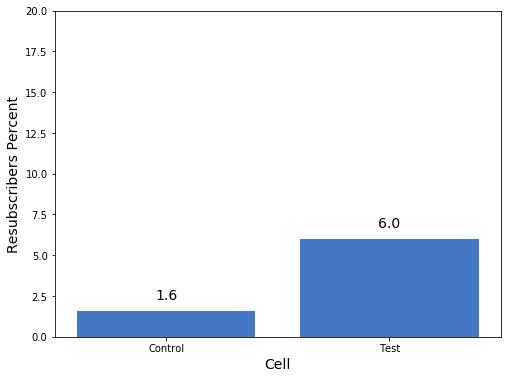

In [300]:


ReSubscription_Rate=pd.crosstab(ab_resubscribers_df['$properties.$mp_message_sends.c3873500.c'],ab_resubscribers_df['Reactivated'],normalize='index').round(3)*100
ReSubscription_Rate=ReSubscription_Rate.loc[:,1].reset_index()
ReSubscription_Rate=ReSubscription_Rate.replace({0: 'Control', 1: 'Test'})
ReSubscription_Rate=ReSubscription_Rate.rename(columns={1: 'ReSubscribers_Percent'})
ReSubscription_Rate

#build chart
sns.barplot(data=ReSubscription_Rate, x='$properties.$mp_message_sends.c3873500.c',y='ReSubscribers_Percent',color='#2f73d952')
plt.ylim([0.0, 20.0])

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()+0.5, '{0:.1f}'.format(p.get_height()), 
            fontsize=14, color='black', ha='center', va='bottom')

#label axes, plot size, and export
plt.xlabel("Cell", fontsize=14)
plt.ylabel("Resubscriber Percent", fontsize=14)

plt.gcf().set_size_inches(8,6)
plt.savefig('ReSubscribers_Percent.png', transparent=True,dpi=(300),edgecolor='w')

In [299]:
#t-test last seen in app
cat1 = ab_resubscribers_df[ab_resubscribers_df['$properties.$mp_message_sends.c3873500.c']==1]
cat2 = ab_resubscribers_df[ab_resubscribers_df['$properties.$mp_message_sends.c3873500.c']==0]

ttest_ind(cat1['Reactivated'], cat2['Reactivated'])

Ttest_indResult(statistic=10.262729887049403, pvalue=1.2355561484538895e-24)